# Лабораторная работа №1

- [Создание датасета](#1)
- [Создание и обучение сети](#2)
- [Оценка обучения](#3)
- [Вывод](#4)

## Создание и разбиение данных <a id='1'></a>

В начале выполнения данной работы необходимо создать датасет, на котором будут производиться все последующие действия. Согласно номеру варианта (а именно 11-ому), уравнение функции выглядит как:
> y = 2,5x^2 на отрезке [-1;1]

Поэтому, создадим 2 массива данных: *первый* содержит список переменных х, *второй* содержит список результатов функции в зависимости от х.

Длина массива X: 201 
Длина массива Y: 201


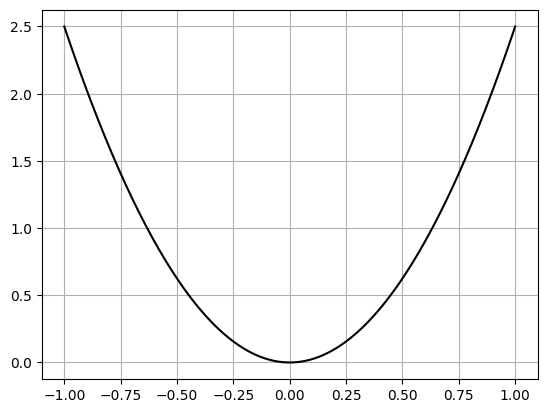

In [5]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.01
x = [round(i,2) for i in np.arange(-1, 1.01, h)]
y = [2.5*(i**2) for i in np.arange(-1, 1.01, h)]
print(f'Длина массива X: {len(x)} \nДлина массива Y: {len(y)}')
plt.plot(x, y, color='black')
plt.grid()
plt.show()

Далее, необходимо на основе вышесозданных массивов создать тестовые наборы, на которых будет обучаться нейронная сеть. Тренировочные датасеты по `x` подбираются по следующему алгоритму:

1) Сперва случайным образом выбирается 10 значений из списка `y`;
2) Из выбранных значений `y` находятся соответствующие им значения `х` и запоминаются;

Тренировочный датасет по `у` создается очень просто: берутся все значения из массива `y` и просто умножаются на то количество раз, которое будет равно числу массивов внутри общего объема `x_train`.

In [9]:
import random

x_train = []
y_train = []

for i in range(5000):
  x_select = random.choices(y, k=10)
  x_axis = []
  for p in x_select:
    x_axis.append(x[y.index(p)])
  x_train.append(x_axis)

y_train = [y]*5000

x_train = np.array(x_train)
y_train = np.array(y_train)
print(f'Длина одного тестового массива по х: {len(x_train[0])} \nДлина одного тестового массива по y: {len(y_train[0])}')

Длина одного тестового массива по х: 10 
Длина одного тестового массива по y: 201


## Создание и обучение нейронной сети <a id='2'></a>

Перед началом работы с нейронной сетью необходимо импортировать все необходимые библиотеки.

In [2]:
from keras.models import Sequential
from keras.layers import Dense

И наконец, можно приступить к созданию нейронной сети с одним внутренним слоём.

In [10]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(10,)),        #Входной слой
    Dense(5000, activation='relu'),
    Dense(201, activation=None)])                           #Выходной слой

model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

model.summary()     #Статистика по нейронной сети

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 5000)              55000     
                                                                 
 dense_9 (Dense)             (None, 201)               1005201   
                                                                 
Total params: 1,060,311
Trainable params: 1,060,311
Non-trainable params: 0
_________________________________________________________________


После создания нейронную сеть необходимо обучить на ранее созданном тестовом наборе.

In [11]:
epoch = model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
157/157 [==============================] - 3s 8ms/step - loss: 1.2274 - accuracy: 0.0158
Epoch 2/10
157/157 [==============================] - 1s 8ms/step - loss: 1.1133 - accuracy: 0.1006
Epoch 3/10
157/157 [==============================] - 1s 8ms/step - loss: 0.9694 - accuracy: 0.2388
Epoch 4/10
157/157 [==============================] - 1s 8ms/step - loss: 0.7725 - accuracy: 0.3582
Epoch 5/10
157/157 [==============================] - 1s 9ms/step - loss: 0.5184 - accuracy: 0.4816
Epoch 6/10
157/157 [==============================] - 1s 8ms/step - loss: 0.2659 - accuracy: 0.6398
Epoch 7/10
157/157 [==============================] - 1s 9ms/step - loss: 0.1123 - accuracy: 0.7164
Epoch 8/10
157/157 [==============================] - 1s 8ms/step - loss: 0.0581 - accuracy: 0.6750
Epoch 9/10
157/157 [==============================] - 1s 8ms/step - loss: 0.0413 - accuracy: 0.6168
Epoch 10/10
157/157 [==============================] - 1s 9ms/step - loss: 0.0329 - accuracy: 0.5660

## Оценка обучения <a id='3'></a>

И наконец, можно оценить правильность обучения нейронной сети путем создания графика по нескольким значениям `x`, которые храняться в общем списке `x_train`

1/1 [==============================] - 0s 21ms/step


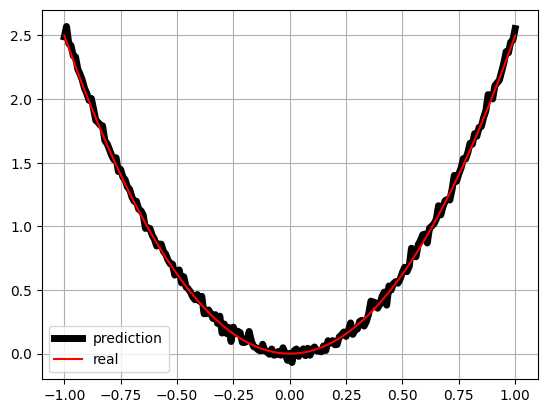

In [454]:
graph = np.array([random.choices(x, k=10)])
predictions = model.predict(graph)[0]

plt.plot(x, predictions, "k", label='prediction', linewidth = 5)
plt.plot(x, y, '-r', label='real', linewidth = 1.5)
plt.legend()
plt.grid()
plt.show()

Также, можно создать график функции изменения ошибки в процессе обучения по эпохам. Для этого при обучении модели результаты обучения можно записывать в некоторую переменную `epoch`, а затем обращатся к ней.

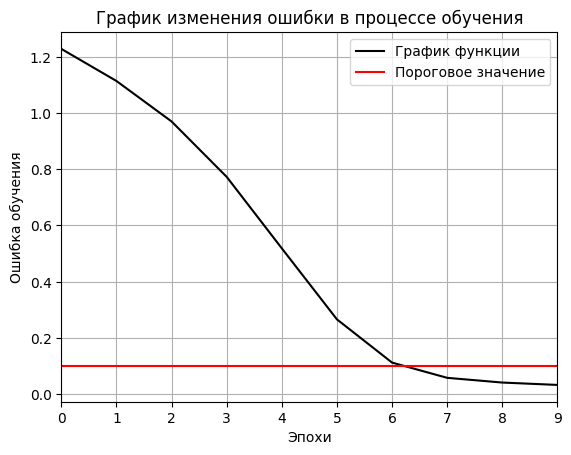

In [19]:
max_error = [0.1 for i in range(10)]
plt.plot(epoch.history['loss'], color='black', label='График функции')
plt.plot(max_error, color='red', label='Пороговое значение')
plt.title('График изменения ошибки в процессе обучения')
plt.xlabel('Эпохи')
plt.xlim([0, 9])
plt.ylabel('Ошибка обучения')
plt.grid()
plt.legend()
plt.show()

Таким образом, исходя из вышеприведенного графика, можно сделать вывод о том, что условие на то, что величина ошибки не должна превышать 0.1, выполняется после 6 по счету эпохе.

## Дополнительное задание <a id='extra'></a>

В качестве дополнительного задание предлагается создать новую модель нейронной сети, в которой отсутствует скрытый слой. Иначе говоря, создать нейронную сеть, состоящую из входного слоя и выходного слоя. Также, эту сеть необходимо обучить на том же тренировочном датасете. Помимо этого, величина ошибки не должна превышать 0,1. И необходимо определить, сколько нужно эпох данной нейронной сети, чтобы условие с величиной ошибки выполнялось.

Для этого запустим бесконечный цикл, в котором каждый раз будет обучаться созданная ранее модель с двумя слоями, а затем будет производиться проверка значения параметра ошибки у данной эпохи. И если она будет меньше заданного значения, то алгоритм завершается и на экран выводиться номер эпохи.

In [36]:
extra_model = Sequential([
    Dense(10, activation='relu', input_shape=(10,)),        #Входной слой
    Dense(201, activation=None)])                           #Выходной слой

extra_model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

extra_model.summary()     #Статистика по нейронной сети

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                110       
                                                                 
 dense_21 (Dense)            (None, 201)               2211      
                                                                 
Total params: 2,321
Trainable params: 2,321
Non-trainable params: 0
_________________________________________________________________


In [37]:
counter = 0
while True:
    epoch = extra_model.fit(x_train, y_train, epochs=1, batch_size=32)
    counter +=1
    if epoch.history['loss'][0] <= 0.1:
        break
print(f'Условие с величиной ошибки было выполненно на {counter} шаге.')

157/157 [==============================] - 0s 1ms/step - loss: 0.0941 - accuracy: 0.1970
Условие с величиной ошибки было выполненно на 18 шаге.


Таким образом, теперь можно снова создать данную модель, обучить её с 18 эпохами и вывести график изменения ошибки в процессе обучения.

In [45]:
extra_model = Sequential([
    Dense(10, activation='relu', input_shape=(10,)),        #Входной слой
    Dense(201, activation=None)])                           #Выходной слой

extra_model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

extra_model.summary()     #Статистика по нейронной сети

epoch = extra_model.fit(x_train, y_train, epochs=21, batch_size=32)     #Обучение нейронки

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 10)                110       
                                                                 
 dense_27 (Dense)            (None, 201)               2211      
                                                                 
Total params: 2,321
Trainable params: 2,321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/21
157/157 [==============================] - 1s 2ms/step - loss: 1.2600 - accuracy: 0.0176
Epoch 2/21
157/157 [==============================] - 0s 1ms/step - loss: 1.2002 - accuracy: 0.0412
Epoch 3/21
157/157 [==============================] - 0s 2ms/step - loss: 1.1426 - accuracy: 0.0572
Epoch 4/21
157/157 [==============================] - 0s 1ms/step - loss: 1.0860 - accuracy: 0.0746
Epoch 5/21
157/157 [===========================

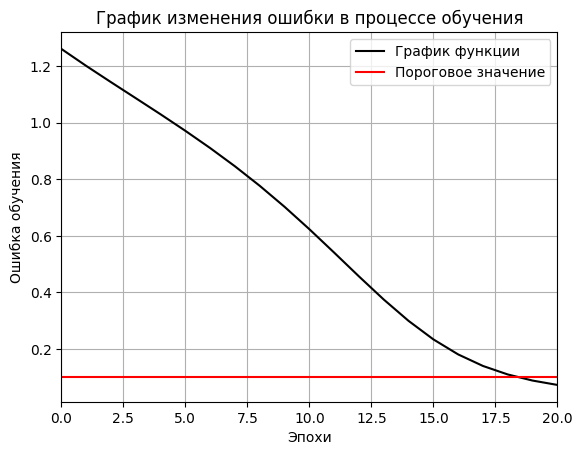

In [46]:
max_error = [0.1 for i in range(21)]
plt.plot(epoch.history['loss'], color='black', label='График функции')
plt.plot(max_error, color='red', label='Пороговое значение')
plt.title('График изменения ошибки в процессе обучения')
plt.xlabel('Эпохи')
plt.xlim([0, 20])
plt.ylabel('Ошибка обучения')
plt.grid()
plt.legend()
plt.show()

А теперь проведём тестирование работоспособности данной нейронной сети на тестовом наборе данных

1/1 [==============================] - 2s 2s/step


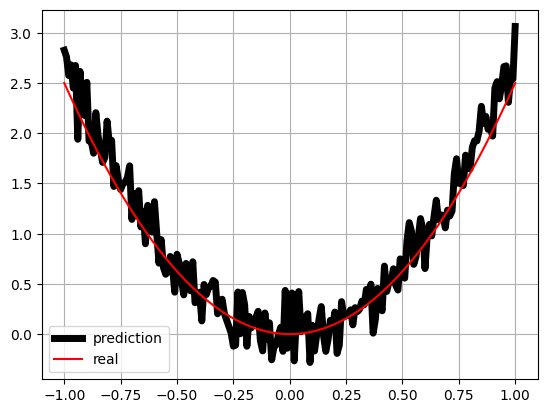

In [47]:
graph = np.array([random.choices(x, k=10)])
predictions = extra_model.predict(graph)[0]

plt.plot(x, predictions, "k", label='prediction', linewidth = 5)
plt.plot(x, y, '-r', label='real', linewidth = 1.5)
plt.legend()
plt.grid()
plt.show()

Как видно из данного графика, в отличии от предыдущей нейронной сети, график работы данной нейронной сети гораздо более неровный, что немного ухудшает представление графика.

Таким образом, можно сделать вывод о том, что даже один скрытый слой в нейронной сети уменьшает выбросы значений на выходе из данной нейронной сети и сглаживает график. Следовательно, скрытый слой необходим для *предсказания* точных данных. А если он будет отсутствовать, то нейронная сеть сможет лишь генерировать лишь примерное значение.

## Вывод <a id='4'></a>

В ходе выполнения данной лабораторной работы я впервые познакомился с таким явлением как *нейронная сеть*. Кроме этого, начал свое знакомство с такой библиотекой для языка `Python`, как `keras`, благодаря которой и была создана первая нейронная сеть.

В процессе выполнения лабораторной работы мной были проделаны следующие шаги:
1) Создан датасет исходной функции, а также создан датасет для обучения нейронной сети. Нейронная сеть обучалась на данных, разбитых на 5000 массивов длинной по 10 элементов.
2) Была создана и обучена нейронная сеть, состоящая из 1 скрытого слоя. Обучение проводилось на созданном ранее тестовом наборе данных. Также, обучение состояло из 10 эпох.
3) Проведена оценка обучения (т.е. оценка результатов, полученных от нейронной сети на тестовом наборе данных). Также был выведен график зависимости изменения ошибки в процессе обучения.